In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/scikitlearn/default/1/heart.xlsx


In [2]:
df = pd.read_excel("/kaggle/input/heart-disease/scikitlearn/default/1/heart.xlsx")


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.shape

(1025, 14)

In [5]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.duplicated().sum()

723

In [10]:
df=df.drop_duplicates(keep='first')

In [11]:
df.shape

(302, 14)

In [12]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [13]:
df['target'].value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7f73b6270150>,
 [Text(-0.14830451966640817, 1.0899567741183667, '1'),
  Text(0.14830451966640754, -1.0899567741183667, '0')],
 [Text(-0.08089337436349535, 0.5945218767918362, '54.30'),
  Text(0.080893374363495, -0.5945218767918363, '45.70')])

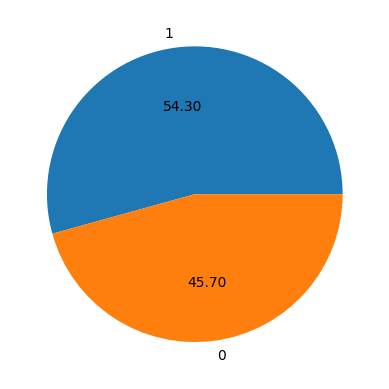

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=[1,0],autopct="%0.2f")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


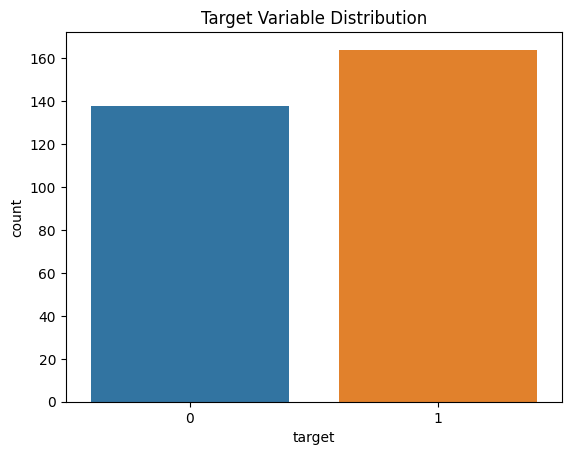

In [16]:
import seaborn as sns
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()


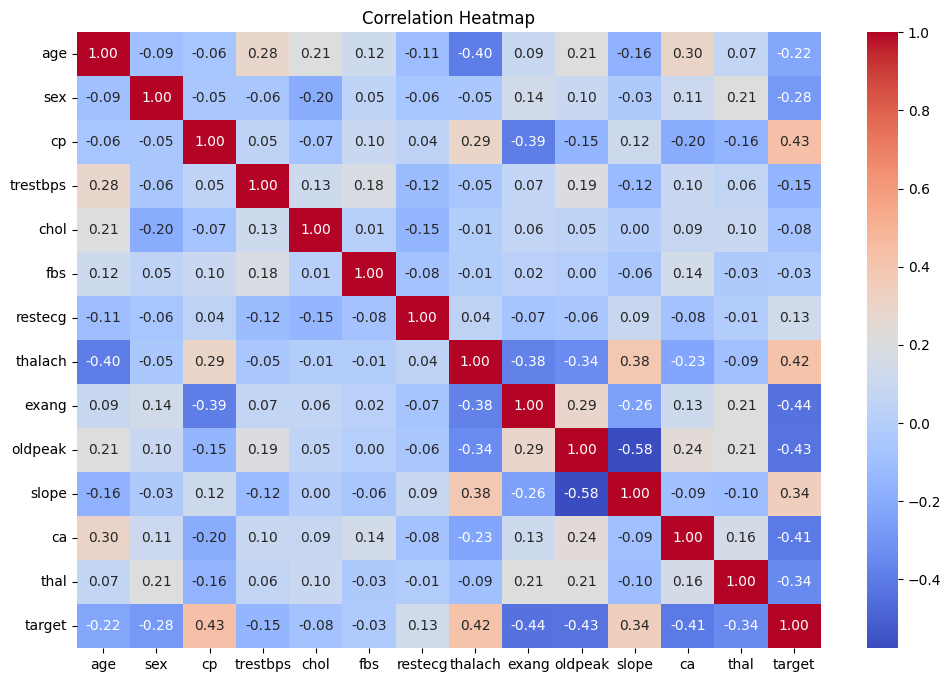

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


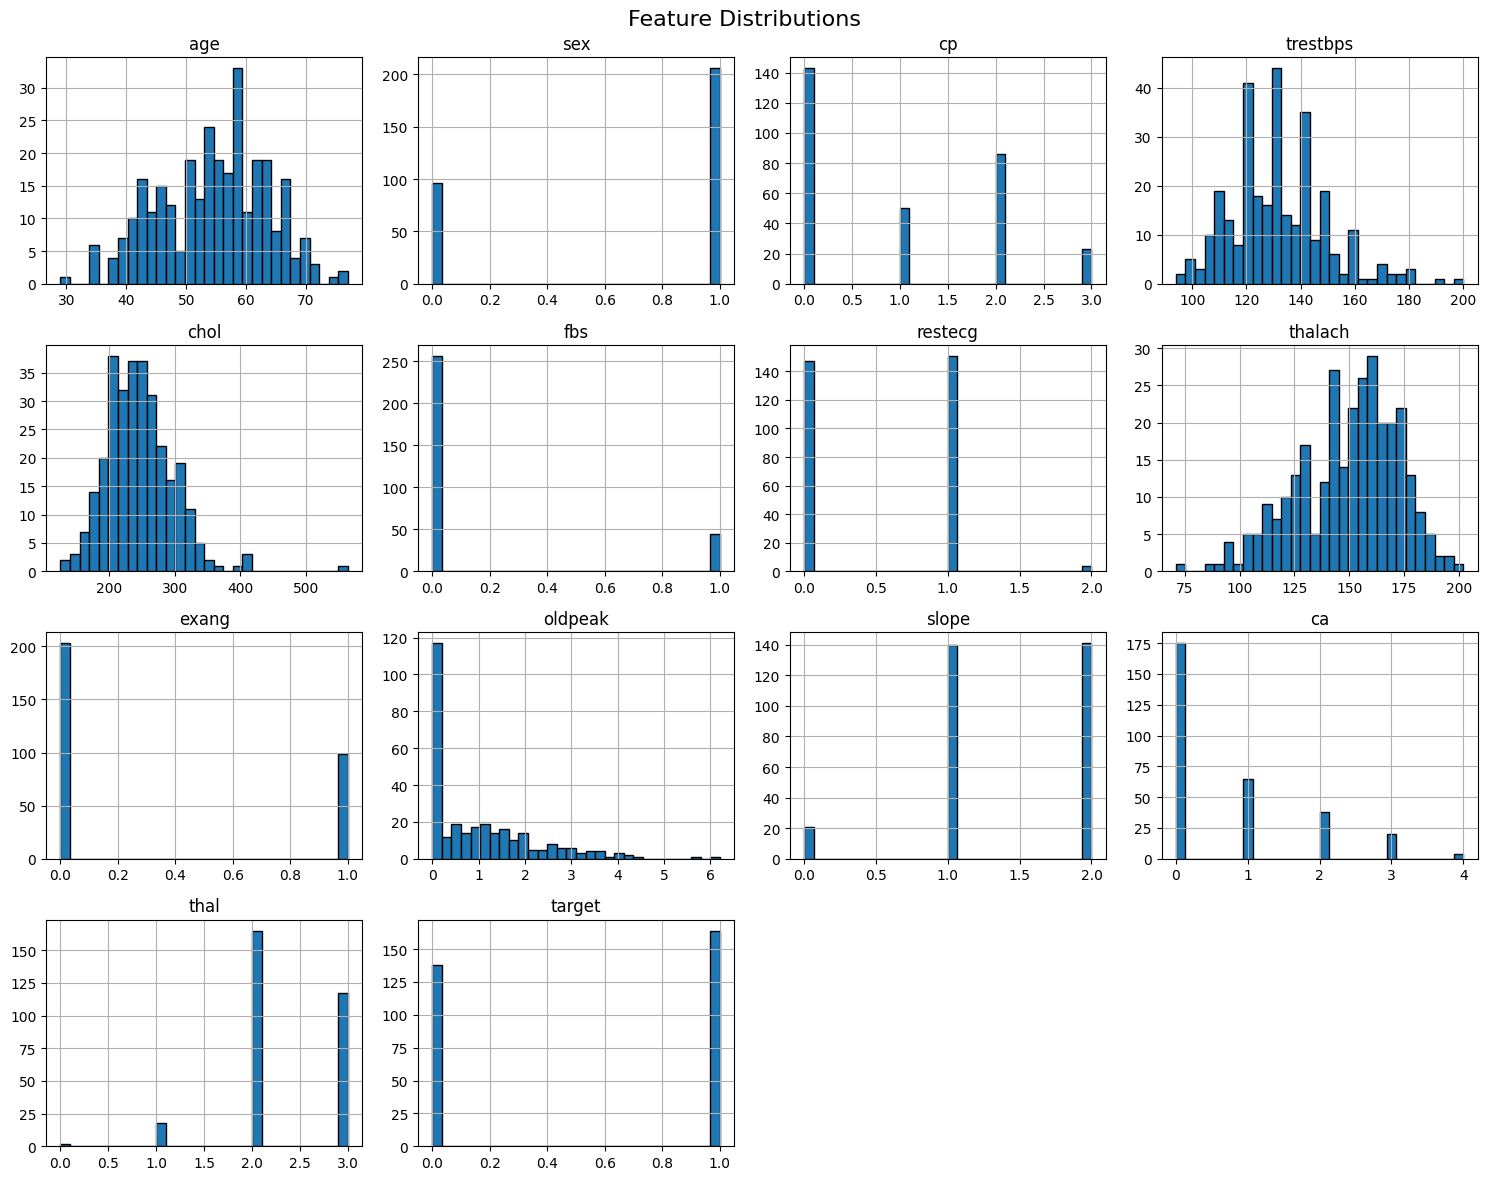

In [18]:
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/3623289082

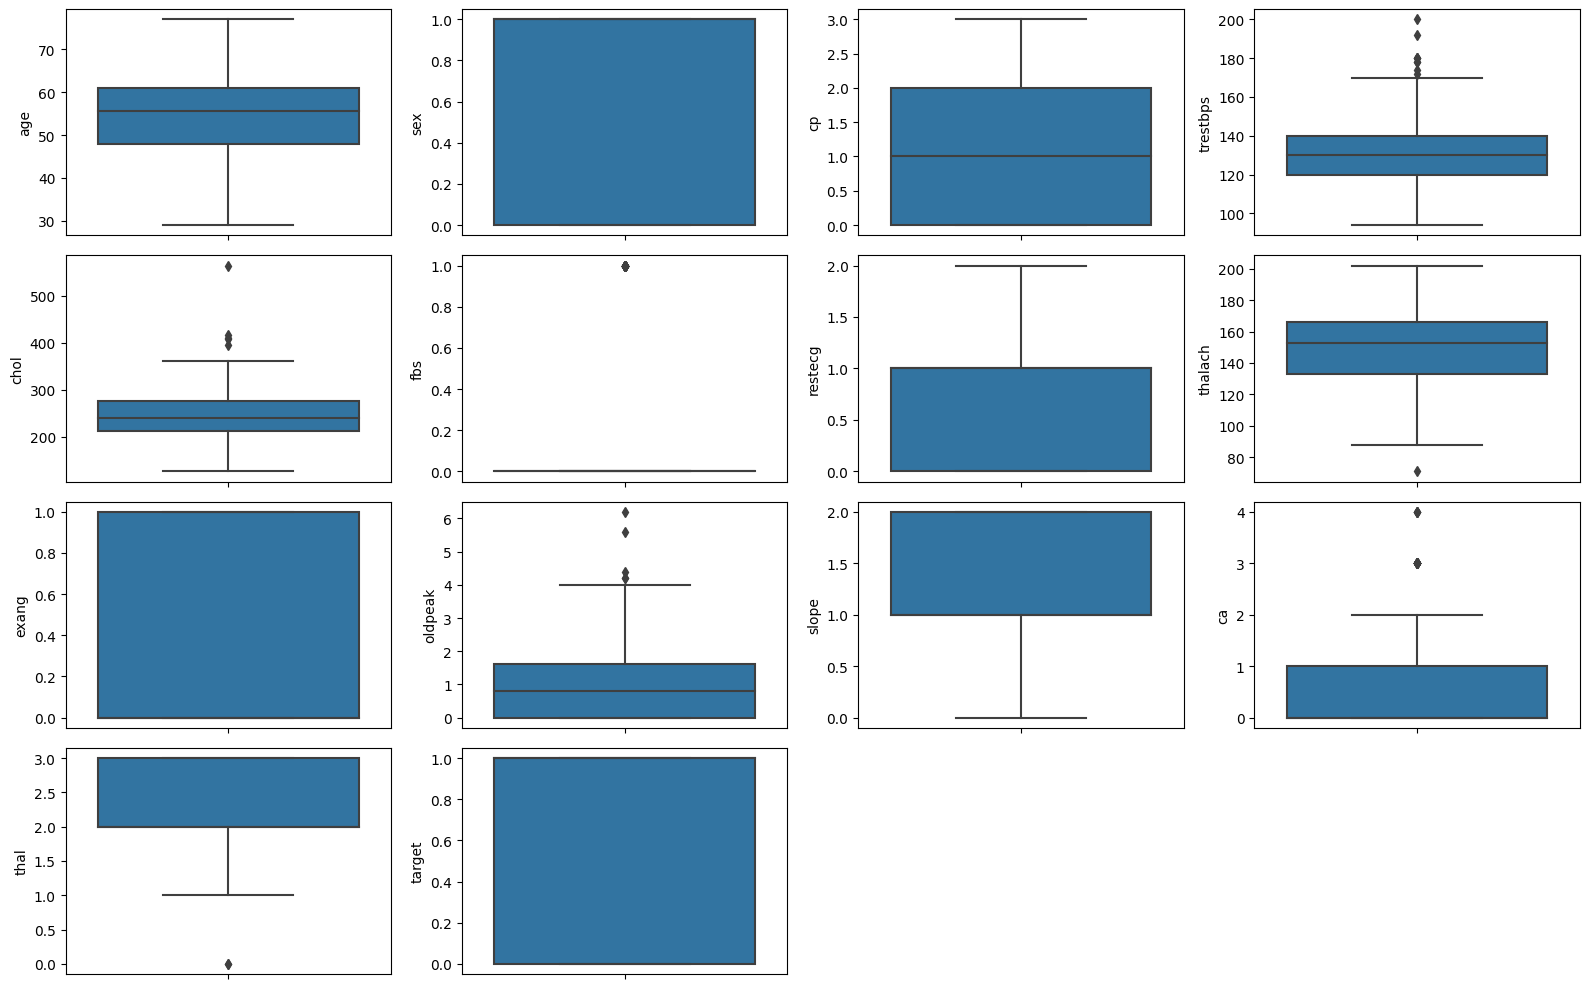

In [19]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, y=col)
    plt.tight_layout()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

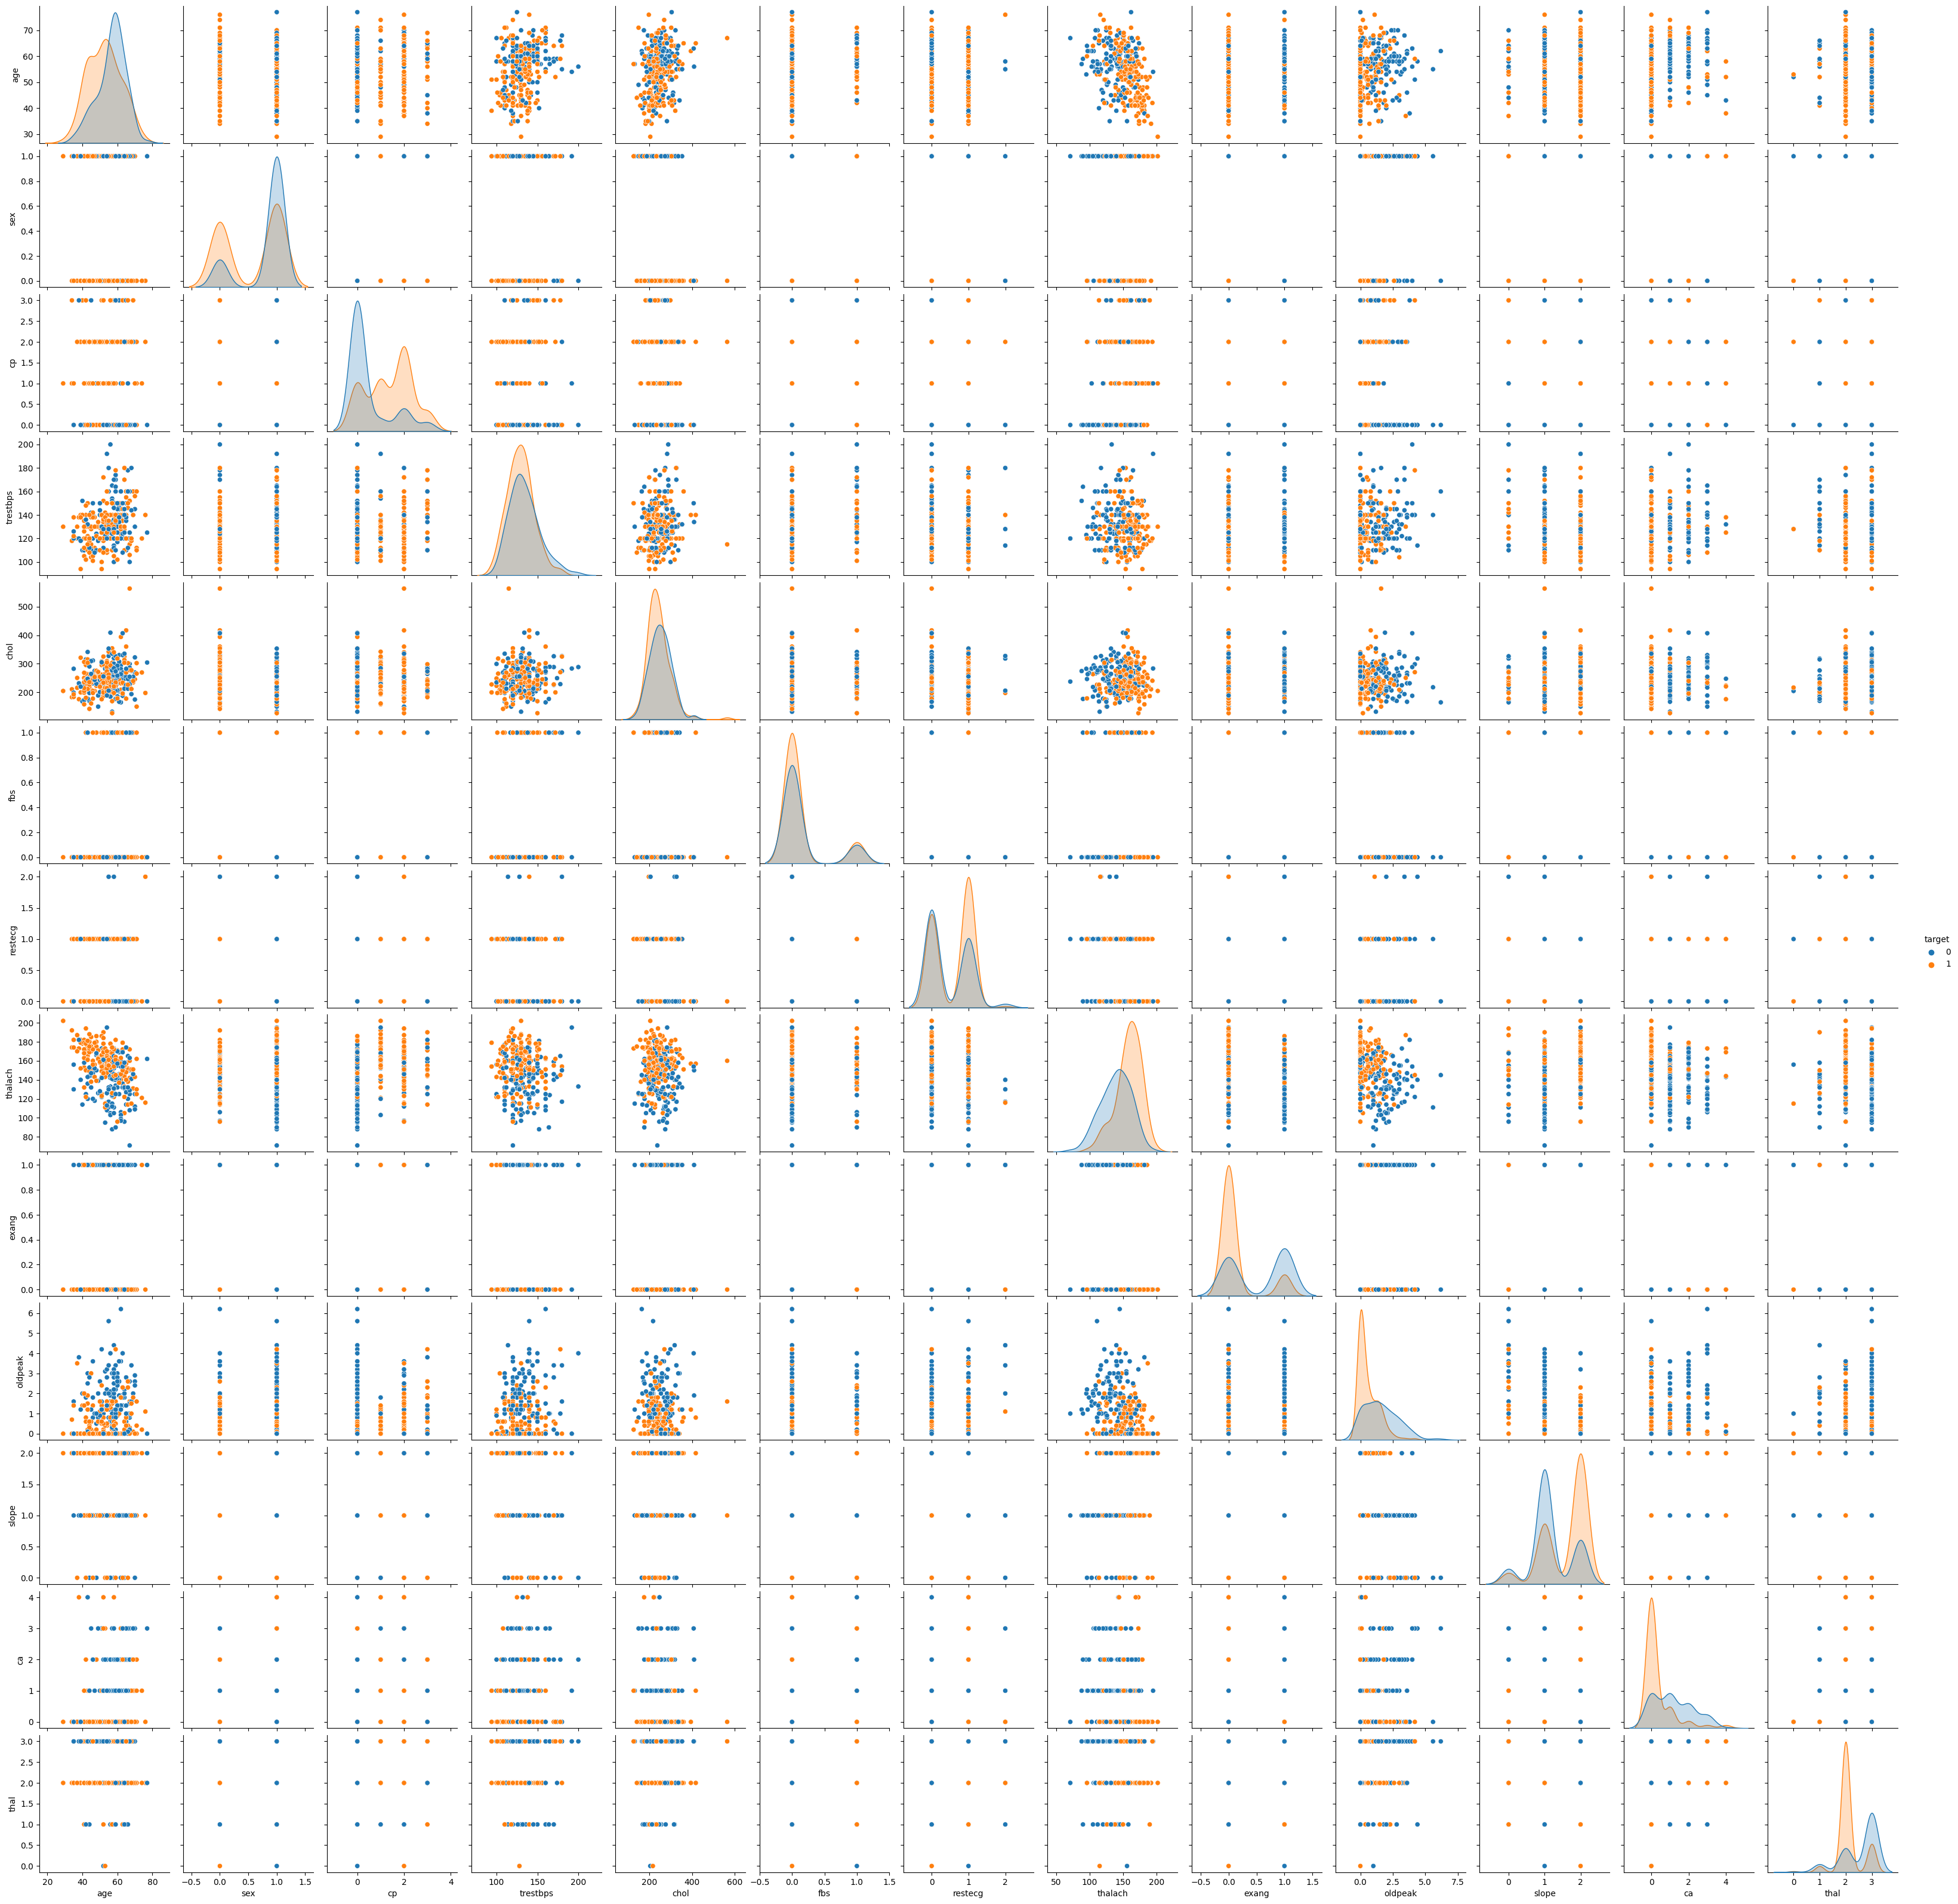

In [20]:
sns.pairplot(df, hue='target')
plt.show()


In [21]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute z-scores
z_scores = np.abs(zscore(df[numeric_cols]))

# Flag outliers with z > 3
z_outliers = (z_scores > 3)

# Count outliers per column
z_outlier_counts = z_outliers.sum(axis=0)

# Display
for col, count in zip(numeric_cols, z_outlier_counts):
    print(f"{col}: {count} outliers (Z-score > 3)")


age: 0 outliers (Z-score > 3)
sex: 0 outliers (Z-score > 3)
cp: 0 outliers (Z-score > 3)
trestbps: 2 outliers (Z-score > 3)
chol: 4 outliers (Z-score > 3)
fbs: 0 outliers (Z-score > 3)
restecg: 0 outliers (Z-score > 3)
thalach: 1 outliers (Z-score > 3)
exang: 0 outliers (Z-score > 3)
oldpeak: 2 outliers (Z-score > 3)
slope: 0 outliers (Z-score > 3)
ca: 4 outliers (Z-score > 3)
thal: 2 outliers (Z-score > 3)
target: 0 outliers (Z-score > 3)


In [22]:
# Store outlier indices
outlier_indices = {}

# IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices[col] = list(outliers)

# Print number of outliers per column
for col, outliers in outlier_indices.items():
    print(f"{col}: {len(outliers)} outliers")


age: 0 outliers
sex: 0 outliers
cp: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
fbs: 45 outliers
restecg: 0 outliers
thalach: 1 outliers
exang: 0 outliers
oldpeak: 5 outliers
slope: 0 outliers
ca: 24 outliers
thal: 2 outliers
target: 0 outliers


In [23]:

# df_cleaned = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]
# print(f"Original shape: {df.shape}")
# print(f"Cleaned shape: {df_cleaned.shape}")

In [24]:
# Cap values at 1st and 99th percentiles
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)


/tmp/ipykernel_13/3297080979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
/tmp/ipykernel_13/3297080979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
/tmp/ipykernel_13/3297080979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [25]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,0,1.0,168.0,0,1.0,2,2.0,3,0
1,53,1,0,140,203.0,1,0.0,155.0,1,3.1,0,0.0,3,0
2,70,1,0,145,174.0,0,1.0,125.0,1,2.6,0,0.0,3,0
3,61,1,0,148,203.0,0,1.0,161.0,0,0.0,2,1.0,3,0
4,62,0,0,138,294.0,1,1.0,106.0,0,1.9,1,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0.0,115.0,0,1.5,1,0.0,2,1
733,44,0,2,108,149.0,0,1.0,175.0,0,0.6,1,0.0,2,1
739,52,1,0,128,255.0,0,1.0,161.0,1,0.0,2,1.0,3,0
843,59,1,3,160,273.0,0,0.0,125.0,0,0.0,2,0.0,2,0


In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212.0,0,1.0,168.0,0,1.0,2,2.0,3
1,53,1,0,140,203.0,1,0.0,155.0,1,3.1,0,0.0,3
2,70,1,0,145,174.0,0,1.0,125.0,1,2.6,0,0.0,3
3,61,1,0,148,203.0,0,1.0,161.0,0,0.0,2,1.0,3
4,62,0,0,138,294.0,1,1.0,106.0,0,1.9,1,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0.0,115.0,0,1.5,1,0.0,2
733,44,0,2,108,149.0,0,1.0,175.0,0,0.6,1,0.0,2
739,52,1,0,128,255.0,0,1.0,161.0,1,0.0,2,1.0,3
843,59,1,3,160,273.0,0,0.0,125.0,0,0.0,2,0.0,2


In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=40)


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [32]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
y_pred=model.predict(x_test)

In [34]:
print("The accuracy score is: ",accuracy_score(y_test,y_pred))

The accuracy score is:  0.8552631578947368


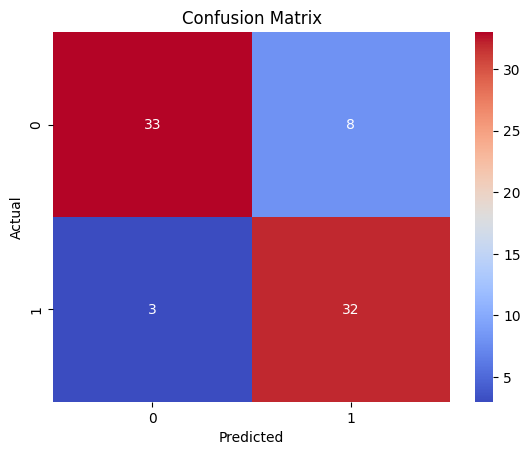

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [36]:
print("The classification report is : ",classification_report(y_test,y_pred))

The classification report is :                precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.80      0.91      0.85        35

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



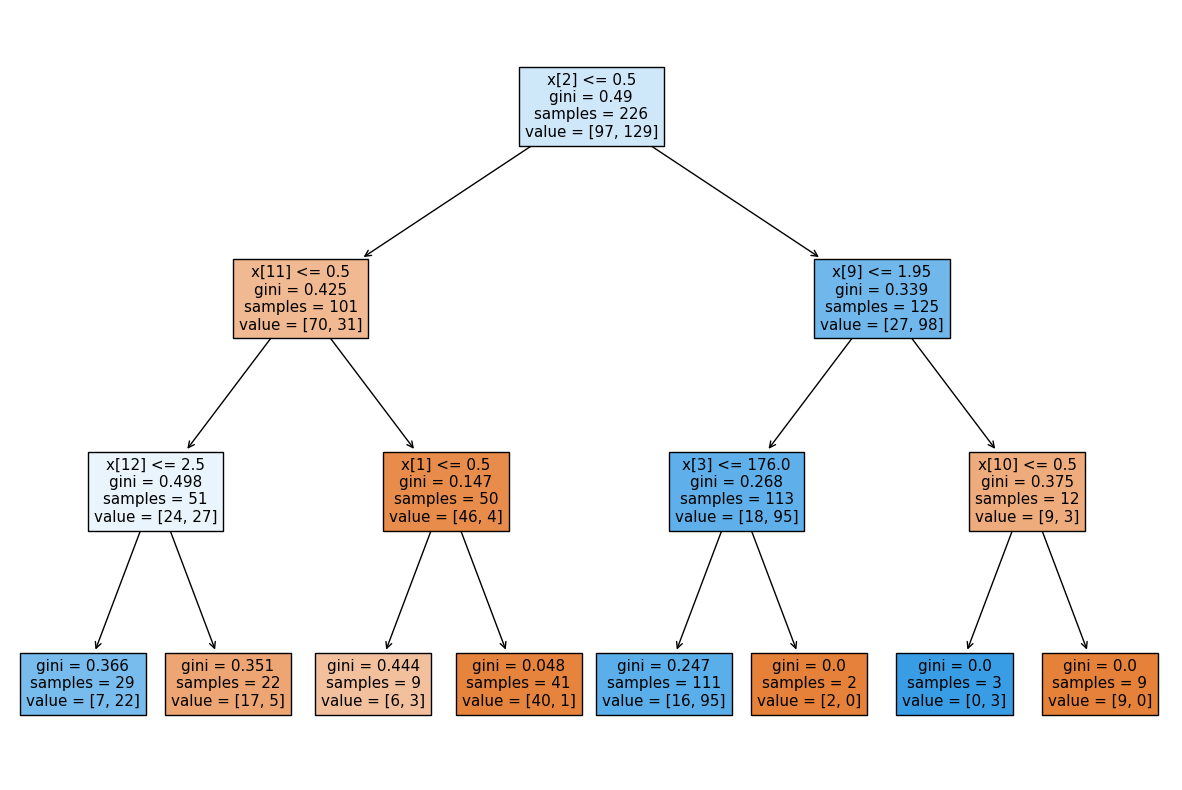

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()